# E-Commerce Churn Prediction

### Enhancing Customer Retention Using a Data Driven Approach

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings('ignore')  # To suppress warnings

In [2]:
df = pd.read_excel('dataset.xlsx',sheet_name='E Comm')
print("Rows and Columns",df.shape)
df.head(3)

Rows and Columns (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


### Description of the columns
	CustomerID :Unique customer ID
	Churn	  :Churn Flag
	Tenure	:Tenure of customer in organization
	PreferredLoginDevice : Preferred login device of customer
	CityTier : City tier
	WarehouseToHome :	Distance in between warehouse to home of customer
	PreferredPaymentMode: Preferred payment method of customer
	Gender:	Gender of customer
	HourSpendOnApp	: Number of hours spend on mobile application or website
	NumberOfDeviceRegistered :	Total number of deceives is registered on particular customer
	PreferedOrderCat :	Preferred order category of customer in last month
	SatisfactionScore:	Satisfactory score of customer on service
	MaritalStatus:	Marital status of customer
	NumberOfAddress:	Total number of added added on particular customer
	Complain:	Any complaint has been raised in last month
	OrderAmountHikeFromlastYear:	Percentage increases in order from last year
	CouponUsed	:Total number of coupon has been used in last month
	OrderCount	:Total number of orders has been places in last month
	DaySinceLastOrder:	Day Since last order by customer
	CashbackAmount	:Average cashback in last month

In [3]:
df.columns = df.columns.str.title()
df.columns

Index(['Customerid', 'Churn', 'Tenure', 'Preferredlogindevice', 'Citytier',
       'Warehousetohome', 'Preferredpaymentmode', 'Gender', 'Hourspendonapp',
       'Numberofdeviceregistered', 'Preferedordercat', 'Satisfactionscore',
       'Maritalstatus', 'Numberofaddress', 'Complain',
       'Orderamounthikefromlastyear', 'Couponused', 'Ordercount',
       'Daysincelastorder', 'Cashbackamount'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customerid                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   Preferredlogindevice         5630 non-null   object 
 4   Citytier                     5630 non-null   int64  
 5   Warehousetohome              5379 non-null   float64
 6   Preferredpaymentmode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   Hourspendonapp               5375 non-null   float64
 9   Numberofdeviceregistered     5630 non-null   int64  
 10  Preferedordercat             5630 non-null   object 
 11  Satisfactionscore            5630 non-null   int64  
 12  Maritalstatus                5630 non-null   object 
 13  Numberofaddress   

In [5]:
df.describe()

,Customerid,Churn,Tenure,Citytier,Warehousetohome,Hourspendonapp,Numberofdeviceregistered,Satisfactionscore,Numberofaddress,Complain,Orderamounthikefromlastyear,Couponused,Ordercount,Daysincelastorder,Cashbackamount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [7]:
948 / 5630 *100

16.838365896980463

In [8]:
print("Checking for Na values")
df.isna().sum()

Checking for Na values


Customerid                       0
Churn                            0
Tenure                         264
Preferredlogindevice             0
Citytier                         0
Warehousetohome                251
Preferredpaymentmode             0
Gender                           0
Hourspendonapp                 255
Numberofdeviceregistered         0
Preferedordercat                 0
Satisfactionscore                0
Maritalstatus                    0
Numberofaddress                  0
Complain                         0
Orderamounthikefromlastyear    265
Couponused                     256
Ordercount                     258
Daysincelastorder              307
Cashbackamount                   0
dtype: int64

In [9]:
print("Percentage of Null Values in the dataset")
df.isna().sum()*100/len(df)

Percentage of Null Values in the dataset


Customerid                     0.000000
Churn                          0.000000
Tenure                         4.689165
Preferredlogindevice           0.000000
Citytier                       0.000000
Warehousetohome                4.458259
Preferredpaymentmode           0.000000
Gender                         0.000000
Hourspendonapp                 4.529307
Numberofdeviceregistered       0.000000
Preferedordercat               0.000000
Satisfactionscore              0.000000
Maritalstatus                  0.000000
Numberofaddress                0.000000
Complain                       0.000000
Orderamounthikefromlastyear    4.706927
Couponused                     4.547069
Ordercount                     4.582593
Daysincelastorder              5.452931
Cashbackamount                 0.000000
dtype: float64

#### Null value imputation

In [10]:
null_cols = ['Tenure','Warehousetohome','Hourspendonapp','Orderamounthikefromlastyear','Couponused','Ordercount','Daysincelastorder']

for col in null_cols:
    df[col].fillna(df[col].median(),inplace=True)
print(df.isna().sum())

Customerid                     0
Churn                          0
Tenure                         0
Preferredlogindevice           0
Citytier                       0
Warehousetohome                0
Preferredpaymentmode           0
Gender                         0
Hourspendonapp                 0
Numberofdeviceregistered       0
Preferedordercat               0
Satisfactionscore              0
Maritalstatus                  0
Numberofaddress                0
Complain                       0
Orderamounthikefromlastyear    0
Couponused                     0
Ordercount                     0
Daysincelastorder              0
Cashbackamount                 0
dtype: int64


In [11]:
print("Checking for duplicates")
df.duplicated().sum()

Checking for duplicates


0

### Box Plots to visualize outliers

In [12]:
df.head(2)

,Customerid,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Hourspendonapp,Numberofdeviceregistered,Preferedordercat,Satisfactionscore,Maritalstatus,Numberofaddress,Complain,Orderamounthikefromlastyear,Couponused,Ordercount,Daysincelastorder,Cashbackamount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90


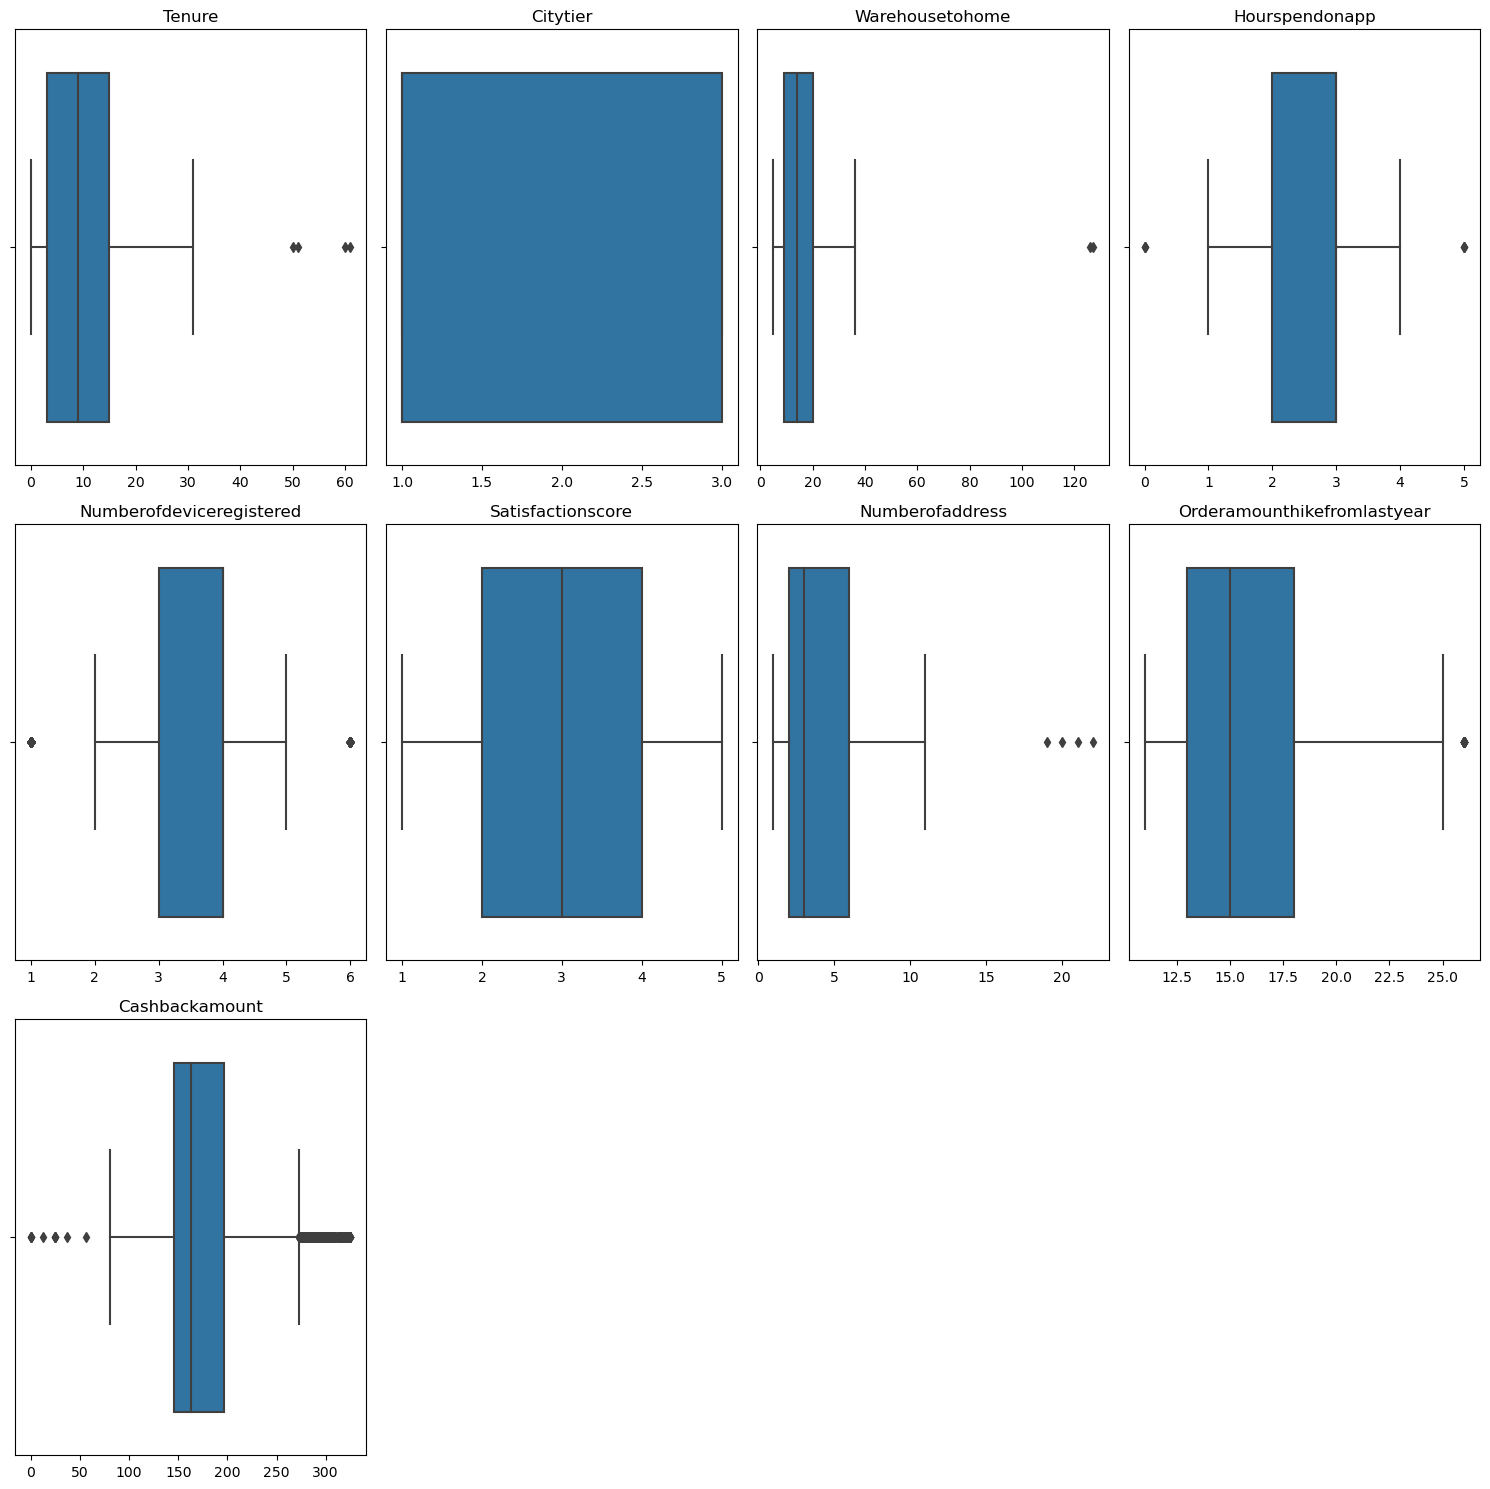

In [13]:
numeric_cols = ['Tenure', 'Citytier', 'Warehousetohome', 'Hourspendonapp', 'Numberofdeviceregistered',
                'Satisfactionscore', 'Numberofaddress', 'Orderamounthikefromlastyear', 'Cashbackamount']

# Calculate number of rows needed
num_plots = len(numeric_cols)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1  # Calculate number of rows needed

# Create a figure and axis with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array to easily iterate over
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axs[i])  # Plot each boxplot in its respective axis
    axs[i].set_title(col)  # Set title for each subplot
    axs[i].set_xlabel('')  # Remove x-label to avoid overlapping

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [14]:
df['Tenure'].describe()

count    5630.000000
mean       10.134103
std         8.357951
min         0.000000
25%         3.000000
50%         9.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64

In [15]:
df.query('Tenure > 20')['Churn'].value_counts()
# Will assume max tenure of the customer towards the service to be 20.

Churn
0    743
1     10
Name: count, dtype: int64

In [16]:
df = df.query('Tenure <= 20')
df.shape

(4877, 20)

In [17]:
df['Warehousetohome'].describe()

count    4877.000000
mean       15.565512
std         8.013016
min         5.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        36.000000
Name: Warehousetohome, dtype: float64

In [18]:
df.query('Warehousetohome > 60')
# We will remove this rows since the distance is very high also they are not churned so it wont make a difference.

,Customerid,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Hourspendonapp,Numberofdeviceregistered,Preferedordercat,Satisfactionscore,Maritalstatus,Numberofaddress,Complain,Orderamounthikefromlastyear,Couponused,Ordercount,Daysincelastorder,Cashbackamount


In [19]:
categorical_cols = ['Preferredlogindevice','Preferredpaymentmode','Gender','Preferedordercat','Maritalstatus']

for col in categorical_cols:
    print(f"{col} => {df[col].unique()}")

Preferredlogindevice => ['Mobile Phone' 'Phone' 'Computer']
Preferredpaymentmode => ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender => ['Female' 'Male']
Preferedordercat => ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Maritalstatus => ['Single' 'Divorced' 'Married']


In [20]:
df['Preferredlogindevice'] = df['Preferredlogindevice'].replace('Mobile Phone','Phone')
df['Preferredlogindevice'].unique()

array(['Phone', 'Computer'], dtype=object)

In [21]:
df['Preferredpaymentmode'] = df['Preferredpaymentmode'].replace('CC','Credit Card')
df['Preferredpaymentmode'] = df['Preferredpaymentmode'].replace('Cash on Delivery','COD')
df['Preferredpaymentmode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'COD', 'E wallet'],
      dtype=object)

In [22]:
df['Preferedordercat'] = df['Preferedordercat'].replace('Mobile Phone','Phone')
df['Preferedordercat'] = df['Preferedordercat'].replace('Mobile','Phone')
df['Preferedordercat'].unique()

array(['Laptop & Accessory', 'Phone', 'Others', 'Fashion', 'Grocery'],
      dtype=object)

In [23]:
df['Maritalstatus'].value_counts()

Maritalstatus
Married     2560
Single      1610
Divorced     707
Name: count, dtype: int64

## EDA

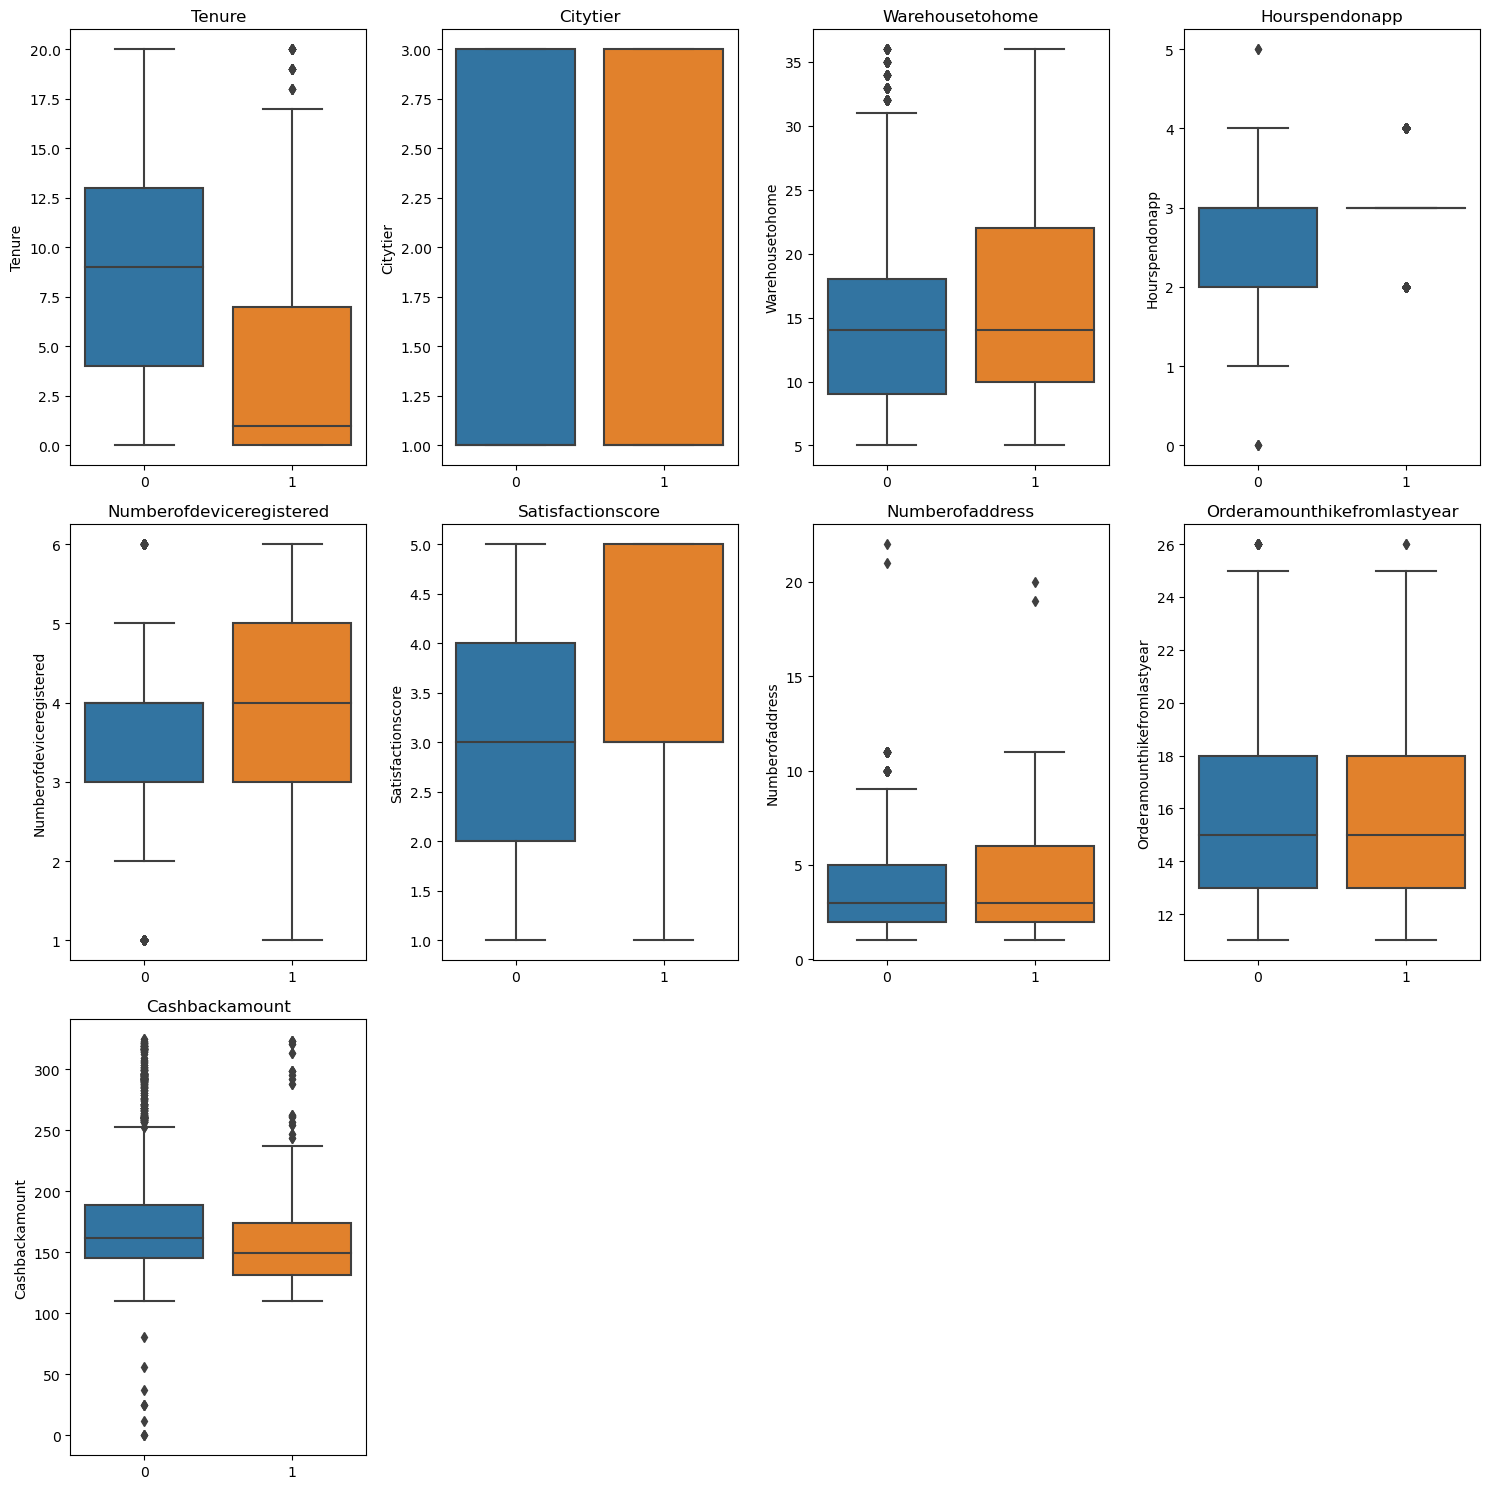

In [24]:
# Calculate number of rows needed
num_plots = len(numeric_cols)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1  # Calculate number of rows needed

# Create a figure and axis with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array to easily iterate over
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df['Churn'], y=df[col],ax=axs[i])  # Plot each boxplot in its respective axis
    axs[i].set_title(col)  # Set title for each subplot
    axs[i].set_xlabel('')  # Remove x-label to avoid overlapping

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

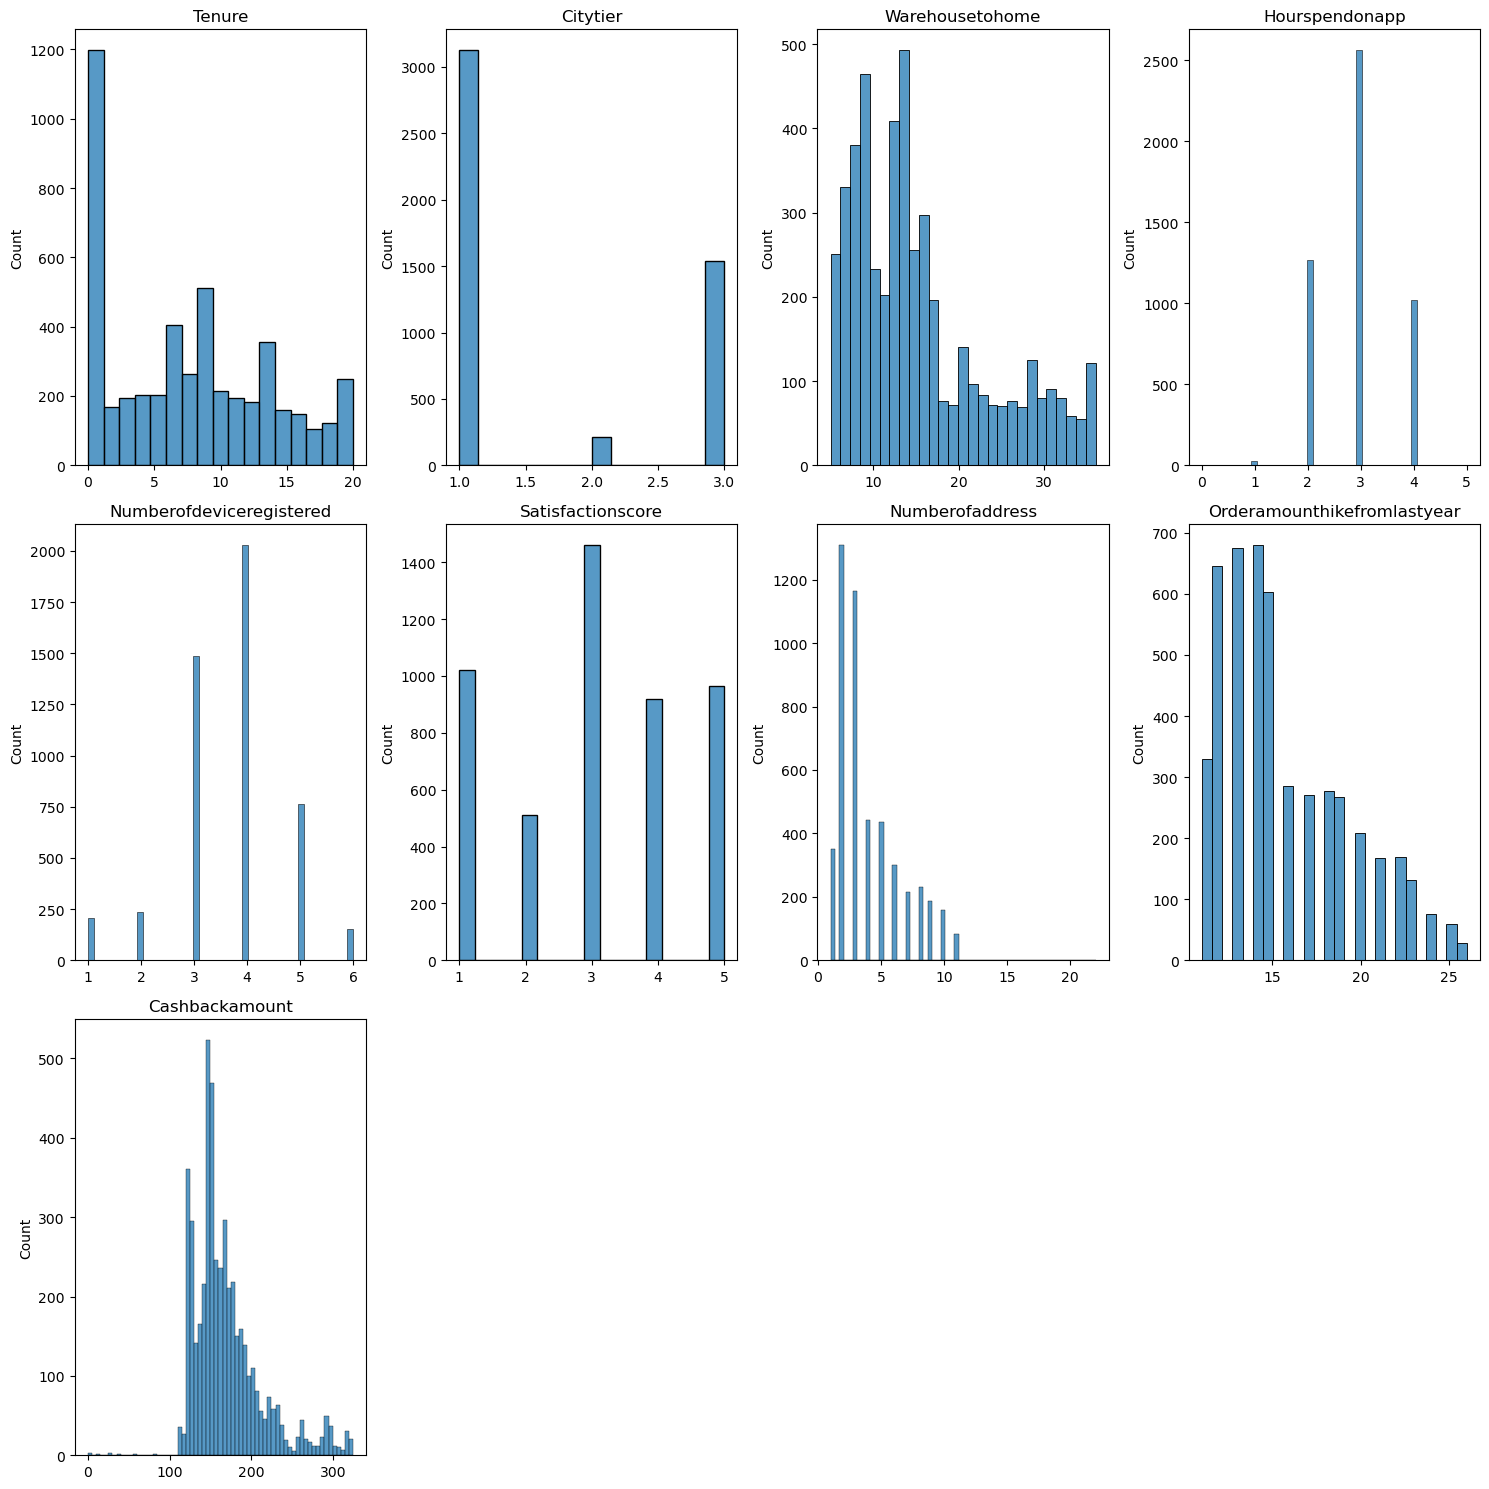

In [25]:
# Calculate number of rows needed
num_plots = len(numeric_cols)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1  # Calculate number of rows needed

# Create a figure and axis with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array to easily iterate over
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(x=df[col], ax=axs[i])  # Plot each boxplot in its respective axis
    axs[i].set_title(col)  # Set title for each subplot
    axs[i].set_xlabel('')  # Remove x-label to avoid overlapping

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [26]:
df.head(3)

,Customerid,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Hourspendonapp,Numberofdeviceregistered,Preferedordercat,Satisfactionscore,Maritalstatus,Numberofaddress,Complain,Orderamounthikefromlastyear,Couponused,Ordercount,Daysincelastorder,Cashbackamount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


<Axes: title={'center': 'Preferred login device of customers who churned'}, ylabel='Preferredlogindevice'>

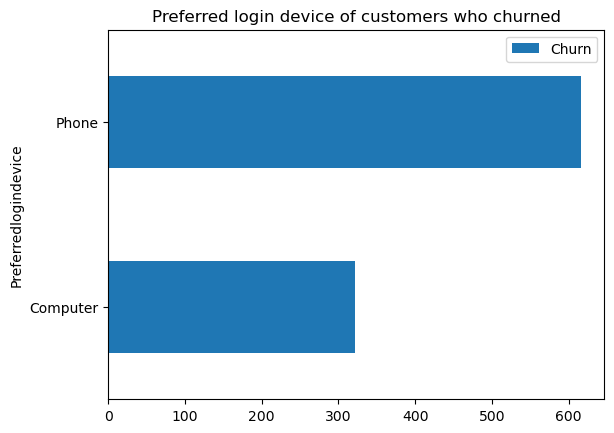

In [27]:
df.groupby('Preferredlogindevice')['Churn'].sum().reset_index() \
      .plot(kind='barh',x='Preferredlogindevice',title='Preferred login device of customers who churned')
       

<Axes: title={'center': 'Preferred Payment mode of customers who churned'}, ylabel='Preferredpaymentmode'>

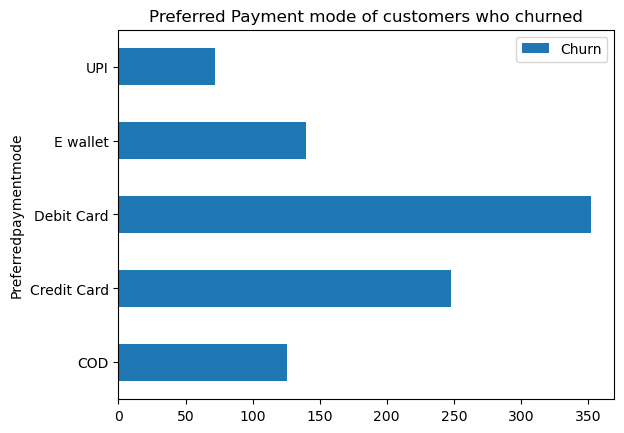

In [28]:
df.groupby('Preferredpaymentmode')['Churn'].sum().reset_index() \
      .plot(kind='barh',x='Preferredpaymentmode',title='Preferred Payment mode of customers who churned')

<Axes: title={'center': 'Marital status of customers who churned'}, ylabel='Maritalstatus'>

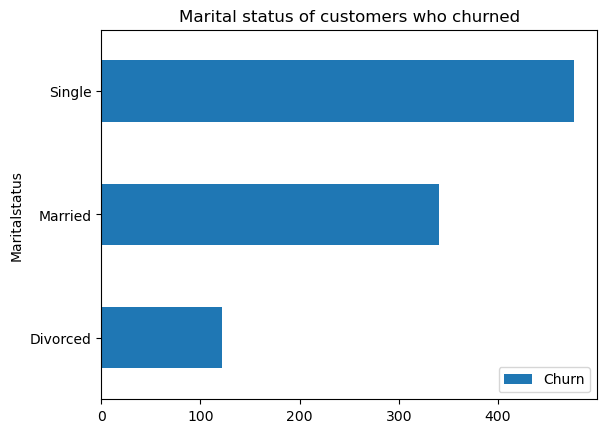

In [29]:
df.groupby('Maritalstatus')['Churn'].sum().reset_index() \
      .plot(kind='barh',x='Maritalstatus',title='Marital status of customers who churned')

<Axes: title={'center': 'Preferred Order category of customers who churned'}, ylabel='Preferedordercat'>

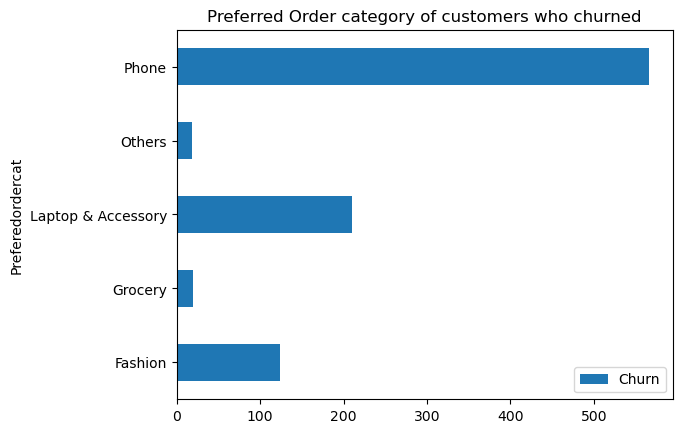

In [30]:
df.groupby('Preferedordercat')['Churn'].sum().reset_index() \
      .plot(kind='barh',x='Preferedordercat',title='Preferred Order category of customers who churned')

<Axes: title={'center': 'Gender wise Count of Churned Customers '}, ylabel='Gender'>

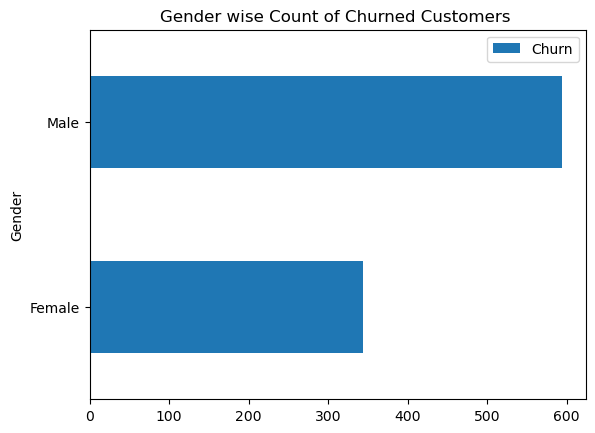

In [58]:
df.groupby('Gender')['Churn'].sum().reset_index() \
       .plot(kind='barh',x='Gender',title='Gender wise Count of Churned Customers ')

In [308]:
print("Customers who complained and later Churned")
print(df[(df['Complain'] == 1) & (df['Churn'] == 1)]['Churn'].count())

Customers who complained and later Churned
502


In [309]:
print("Customers who didnt complain but still Churned")
print(df[(df['Complain'] == 0) & (df['Churn'] == 1)]['Churn'].count())

Customers who didnt complain but still Churned
436


### Insights From EDA:

1. Customers using mobile phone over computers likely churned.
2. Customers using Debit card churned in more numbers.
3. Preffered Order category of customers who churned were Phone.


In [31]:
numeric_cols_corr = df.select_dtypes(['float64','int64']).columns

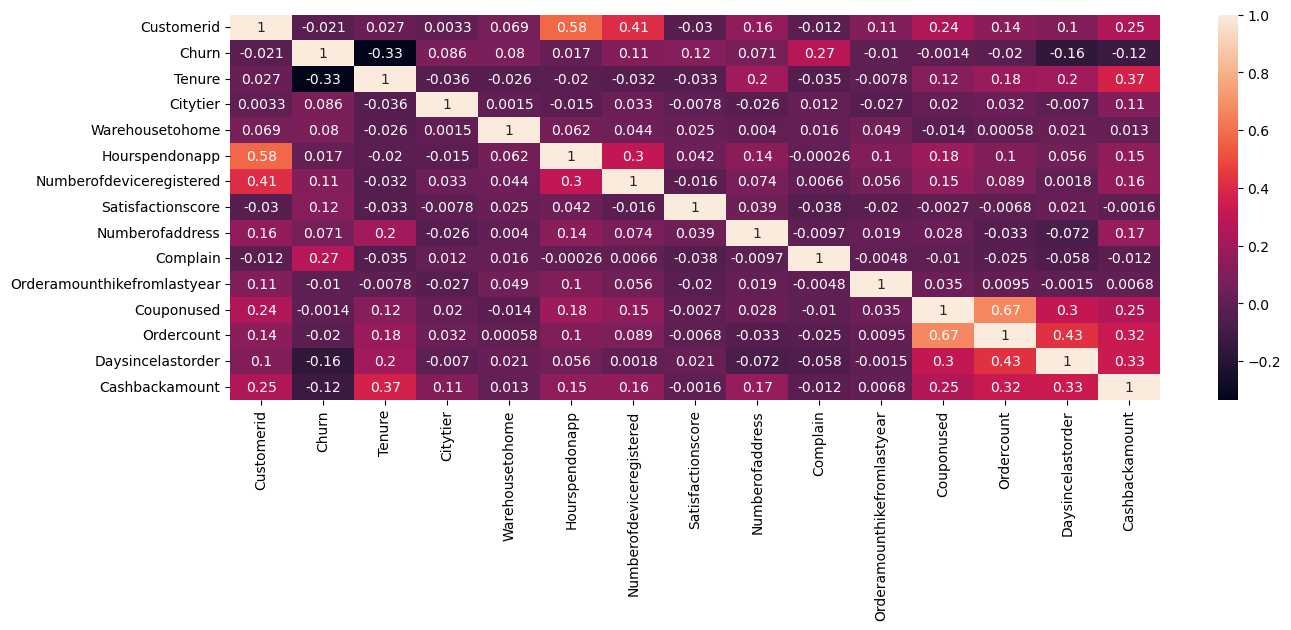

In [32]:
cm = df[numeric_cols_corr].corr()

plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True)
plt.show()

Calculate VIF for feature selection:

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['columns'] = data.columns
    vif_df['vif'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]

    return vif_df

In [34]:
calculate_vif(df[numeric_cols_corr.drop(['Customerid','Churn'])])

,columns,vif
0,Tenure,3.325776
1,Citytier,4.216259
2,Warehousetohome,4.671441
3,Hourspendonapp,19.387571
4,Numberofdeviceregistered,14.634551
5,Satisfactionscore,5.454209
6,Numberofaddress,3.859746
7,Complain,1.396725
8,Orderamounthikefromlastyear,14.877508
9,Couponused,3.530703


In [46]:
cols_to_drop_vif_corr = ['Hourspendonapp','Numberofdeviceregistered','Orderamounthikefromlastyear'
                         ,'Numberofaddress','Cashbackamount']

df = df.drop(cols_to_drop_vif_corr,axis=1)
df.head(1)

,Customerid,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Preferedordercat,Satisfactionscore,Maritalstatus,Complain,Couponused,Ordercount,Daysincelastorder
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,Laptop & Accessory,2,Single,1,1.0,1.0,5.0


In [49]:
df = df.drop('Customerid',axis=1)
df.head(1)

,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Preferedordercat,Satisfactionscore,Maritalstatus,Complain,Couponused,Ordercount,Daysincelastorder
0,1,4.0,Phone,3,6.0,Debit Card,Female,Laptop & Accessory,2,Single,1,1.0,1.0,5.0


### Feature Encoding

In [64]:
df[categorical_cols].head(3)

,Preferredlogindevice,Preferredpaymentmode,Gender,Preferedordercat,Maritalstatus
0,Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Phone,Single
2,Phone,Debit Card,Male,Phone,Single


In [69]:
for col in categorical_cols:
    print(f"{col} => {df[col].unique()}")

Preferredlogindevice => ['Phone' 'Computer']
Preferredpaymentmode => ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender => ['Female' 'Male']
Preferedordercat => ['Laptop & Accessory' 'Phone' 'Others' 'Fashion' 'Grocery']
Maritalstatus => ['Single' 'Divorced' 'Married']


In [70]:
mapping_dict = {
    'Preferredlogindevice': {'Phone': 1, 'Computer': 2},
    'Preferredpaymentmode': {'Debit Card': 1, 'UPI': 2, 'Credit Card': 3, 'COD': 4, 'E wallet': 5},
    'Gender': {'Female': 1, 'Male': 2},
    'Preferedordercat': {'Laptop & Accessory': 1, 'Phone': 2, 'Others': 3, 'Fashion': 4, 'Grocery': 5},
    'Maritalstatus': {'Single': 1, 'Divorced': 2, 'Married': 3}
}

for col, mapping in mapping_dict.items():
    df[col] = df[col].map(mapping)


In [74]:
df.head(3)

,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Preferedordercat,Satisfactionscore,Maritalstatus,Complain,Couponused,Ordercount,Daysincelastorder
0,1,4.0,1,3,6.0,1,1,1,2,1,1,1.0,1.0,5.0
1,1,9.0,1,1,8.0,2,2,2,3,1,1,0.0,1.0,0.0
2,1,9.0,1,1,30.0,1,2,2,3,1,1,0.0,1.0,3.0


### Model Training

#### Without handling class imbalance

In [104]:
X = df.drop('Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [105]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(3657, 13) (3657,)
(1220, 13) (1220,)


In [106]:
def get_report(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test,y_pred) 
    
    print(report)

In [108]:
get_report(LogisticRegression(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       995
           1       0.65      0.45      0.54       225

    accuracy                           0.85      1220
   macro avg       0.77      0.70      0.72      1220
weighted avg       0.84      0.85      0.84      1220



In [109]:
get_report(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       995
           1       0.82      0.90      0.86       225

    accuracy                           0.94      1220
   macro avg       0.90      0.93      0.91      1220
weighted avg       0.95      0.94      0.95      1220



In [110]:
get_report(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       995
           1       0.88      0.83      0.85       225

    accuracy                           0.95      1220
   macro avg       0.92      0.90      0.91      1220
weighted avg       0.95      0.95      0.95      1220



### Handle class imbalance

In [111]:
from imblearn.under_sampling import RandomUnderSampler

In [114]:
under_sampler = RandomUnderSampler()
X_rndm ,y_rndm = under_sampler.fit_resample(X,y)

In [115]:
get_report(LogisticRegression(),X_rndm,y_rndm,X_test,y_test)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       995
           1       0.40      0.80      0.54       225

    accuracy                           0.75      1220
   macro avg       0.67      0.77      0.68      1220
weighted avg       0.84      0.75      0.77      1220



In [116]:
get_report(DecisionTreeClassifier(),X_rndm,y_rndm,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       995
           1       0.68      1.00      0.81       225

    accuracy                           0.91      1220
   macro avg       0.84      0.95      0.88      1220
weighted avg       0.94      0.91      0.92      1220



In [117]:
get_report(RandomForestClassifier(),X_rndm,y_rndm,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       995
           1       0.72      1.00      0.83       225

    accuracy                           0.93      1220
   macro avg       0.86      0.96      0.89      1220
weighted avg       0.95      0.93      0.93      1220



In [118]:
from imblearn.over_sampling import SMOTE

In [120]:
smt = SMOTE()

X_smt,y_smt = smt.fit_resample(X,y)


In [121]:
get_report(LogisticRegression(),X_smt,y_smt,X_test,y_test)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       995
           1       0.41      0.80      0.54       225

    accuracy                           0.75      1220
   macro avg       0.67      0.77      0.68      1220
weighted avg       0.84      0.75      0.77      1220



In [122]:
get_report(DecisionTreeClassifier(),X_smt,y_smt,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       995
           1       1.00      1.00      1.00       225

    accuracy                           1.00      1220
   macro avg       1.00      1.00      1.00      1220
weighted avg       1.00      1.00      1.00      1220



In [123]:
get_report(RandomForestClassifier(),X_smt,y_smt,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       995
           1       1.00      1.00      1.00       225

    accuracy                           1.00      1220
   macro avg       1.00      1.00      1.00      1220
weighted avg       1.00      1.00      1.00      1220



In [231]:
from xgboost import XGBClassifier

get_report(XGBClassifier(),X_smt,y_smt,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       995
           1       0.97      1.00      0.98       225

    accuracy                           0.99      1220
   macro avg       0.98      1.00      0.99      1220
weighted avg       0.99      0.99      0.99      1220



In [222]:
get_report(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       995
           1       0.82      0.90      0.86       225

    accuracy                           0.95      1220
   macro avg       0.90      0.93      0.91      1220
weighted avg       0.95      0.95      0.95      1220



In [232]:
best_model = XGBClassifier()
best_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [241]:
y_pred_prob = best_model.predict_proba(X_test)[:,1]

chosen_threshold = 0.25

y_pred_custom = (y_pred_prob >= chosen_threshold)

print(classification_report(y_test,y_pred_custom))


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       995
           1       0.79      0.94      0.86       225

    accuracy                           0.94      1220
   macro avg       0.89      0.94      0.91      1220
weighted avg       0.95      0.94      0.94      1220



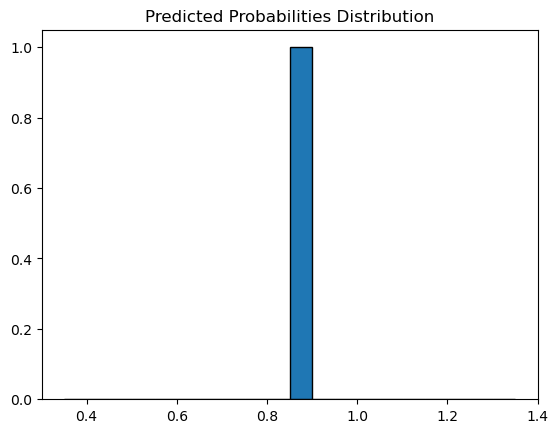

In [335]:
plt.hist(y_pred_prob, bins=20, edgecolor='k')
plt.title('Predicted Probabilities Distribution')
plt.show()

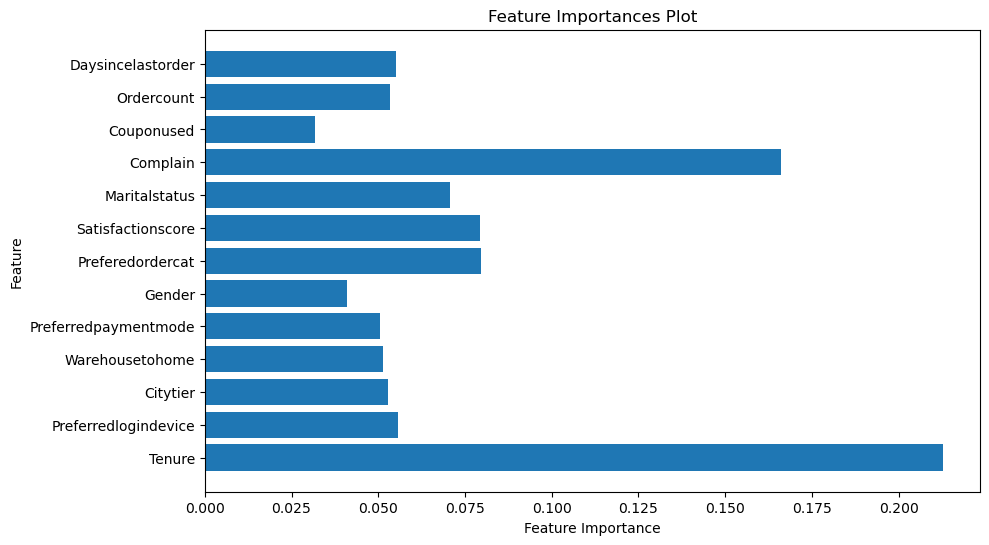

In [334]:
feature_importances = best_model.feature_importances_

plt.figure(figsize=(10, 6)) 
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances Plot')
plt.show()

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)

In [256]:
from sklearn.metrics import auc

auc_curve = auc(fpr, tpr)
print(f"Auc = {round(auc_curve,3)}")


Auc = 0.979


In [257]:
X_train.head(1)

,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Preferedordercat,Satisfactionscore,Maritalstatus,Complain,Couponused,Ordercount,Daysincelastorder
5051,18.00,1,1,9.00,1,1,2,1,3,0,2.00,8.00,8.00


In [258]:
X_train.columns

Index(['Tenure', 'Preferredlogindevice', 'Citytier', 'Warehousetohome',
       'Preferredpaymentmode', 'Gender', 'Preferedordercat',
       'Satisfactionscore', 'Maritalstatus', 'Complain', 'Couponused',
       'Ordercount', 'Daysincelastorder'],
      dtype='object')

In [320]:
user_input = {
    'Tenure': 2,
    'Preferredlogindevice': 'Phone',
    'Citytier': 3,
    'Warehousetohome': 8,
    'Preferredpaymentmode': 'UPI',
    'Gender': 'Female',
    'Preferedordercat': 'Fashion',
    'Satisfactionscore': 4,
    'Maritalstatus': 'Single',
    'Complain': 1,
    'Couponused': 3,
    'Ordercount': 15,
    'Daysincelastorder': 50
}

# Map categorical columns to numeric values
user_input_encoded = {
    'Tenure': user_input['Tenure'],
    'Preferredlogindevice': 1 if user_input['Preferredlogindevice'] == 'Phone' else 2,
    'Citytier': user_input['Citytier'],
    'Warehousetohome': user_input['Warehousetohome'],
    'Preferredpaymentmode': {
        'Debit Card': 1,
        'UPI': 2,
        'Credit Card': 3,
        'COD': 4,
        'E wallet': 5
    }[user_input['Preferredpaymentmode']],
    'Gender': 1 if user_input['Gender'] == 'Male' else 2,
    'Preferedordercat': {
        'Laptop & Accessory': 1,
        'Phone': 2,
        'Others': 3,
        'Fashion': 4,
        'Grocery': 5
    }[user_input['Preferedordercat']],
    'Satisfactionscore': user_input['Satisfactionscore'],
    'Maritalstatus': {
        'Single': 1,
        'Divorced': 2,
        'Married': 3
    }[user_input['Maritalstatus']],
    'Complain': user_input['Complain'],
    'Couponused': user_input['Couponused'],
    'Ordercount': user_input['Ordercount'],
    'Daysincelastorder': user_input['Daysincelastorder'],
}


In [321]:
# Convert to DataFrame (if required by your model)
user_input_df = pd.DataFrame([user_input_encoded])

# Predict probabilities
y_pred_prob = best_model.predict_proba(user_input_df)[:, 1]  # Probability for churn class (1)

# Define custom threshold
threshold = 0.25

# Classify based on the threshold
if y_pred_prob[0] >= threshold:
    print("Prediction: The customer is likely to churn.")
else:
    print("Prediction: The customer is not likely to churn.")


Prediction: The customer is likely to churn.


## Future customers likely to be churned:

In [346]:
y_pred_dataset = best_model.predict_proba(X)[:,1] # We will predict on the entire dataset

threshold_data = 0.25

# Predict churn based on the threshold, added a column in the dataset
df['Churn_Prediction'] = (y_pred_dataset >= threshold_data) 

# Filter the dataset to get customers likely to churn
churned_customers = df[df['Churn_Prediction'] == 1]

index = churned_customers.index # To later relocate the customer_id of those customer using this index.

print(f"Total Churned Customers: {len(churned_customers)}")
churned_customers

Total Churned Customers: 986


,Churn,Tenure,Preferredlogindevice,Citytier,Warehousetohome,Preferredpaymentmode,Gender,Preferedordercat,Satisfactionscore,Maritalstatus,Complain,Couponused,Ordercount,Daysincelastorder,Churn_Prediction
0,1,4.00,1,3,6.00,1,1,1,2,1,1,1.00,1.00,5.00,True
1,1,9.00,1,1,8.00,2,2,2,3,1,1,0.00,1.00,0.00,True
2,1,9.00,1,1,30.00,1,2,2,3,1,1,0.00,1.00,3.00,True
3,1,0.00,1,3,15.00,1,2,1,5,1,0,0.00,1.00,3.00,True
4,1,0.00,1,1,12.00,3,2,2,5,1,0,1.00,1.00,3.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,1,1.00,2,3,16.00,5,2,2,5,3,0,2.00,2.00,1.00,True
5602,1,1.00,1,1,8.00,3,2,2,1,3,1,3.00,3.00,3.00,True
5604,1,20.00,1,1,14.00,4,2,2,3,3,0,7.00,10.00,9.00,True
5612,1,14.00,2,3,8.00,1,2,1,3,3,0,2.00,2.00,2.00,True
